In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
np.set_printoptions(threshold=np.inf)       # Display entire numpy arrays

In [2]:
serie_player_standard_stats = pd.read_csv('Serie_player_standard_stats.csv')
serie_player_standard_stats.head()

Player   Nation Pos          Squad   Age    Born    MP  Starts  \
0     James Abankwah   ie IRL  DF        Udinese  18.0  2004.0   2.0     1.0   
1  Oliver Abildgaard   dk DEN  MF  Hellas Verona  26.0  1996.0  13.0     6.0   
2      Tammy Abraham  eng ENG  FW           Roma  24.0  1997.0  38.0    24.0   
3   Christian Acella   it ITA  MF      Cremonese  20.0  2002.0   1.0     0.0   
4   Francesco Acerbi   it ITA  DF          Inter  34.0  1988.0  31.0    25.0   

     Min   90s  Gls  Ast   G+A  G-PK   PK  PKatt  CrdY  CrdR    xG  npxG  xAG  \
0     63   0.7  0.0  0.0   0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0  0.0   
1    592   6.6  0.0  0.0   0.0   0.0  0.0    0.0   2.0   0.0   0.1   0.1  0.4   
2  2,189  24.3  8.0  3.0  11.0   8.0  0.0    0.0   2.0   0.0  10.8  10.8  3.6   
3     15   0.2  0.0  0.0   0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0  0.0   
4  2,425  26.9  0.0  2.0   2.0   0.0  0.0    0.0   4.0   0.0   1.0   1.0  1.1   

   npxG+xAG  PrgC   PrgP   PrgR  Gls.1  Ast.1  G+A.1  G-PK.1  G+A-PK  xG.1  \
0       0.0   0.0    0.0    0.0   0.00   0.00   0.00    0.00    0.00  0.00   
1       0.6   2.0   15.0    8.0   0.00   0.00   0.00    0.00    0.00  0.02   
2      14.5  35.0   54.0  141.0   0.33   0.12   0.45    0.33    0.45  0.45   
3       0.0   0.0    0.0    0.0   0.00   0.00   0.00    0.00    0.00  0.00   
4       2.1  39.0  100.0   32.0   0.00   0.07   0.07    0.00    0.07  0.04   

   xAG.1  xG+xAG  npxG.1  npxG+xAG.1  Matches  
0   0.00    0.00    0.00        0.00  Matches  
1   0.07    0.09    0.02        0.09  Matches  
2   0.15    0.60    0.45        0.60  Matches  
3   0.00    0.00    0.00        0.00  Matches  
4   0.04    0.08    0.04        0.08  Matches

In [3]:
# Rename the columns
new_column_names = {'G-PK': 'npGls', 'Gls.1': 'Glsp90', 'Ast.1': 'Astp90', 'G+A.1': 'G+Ap90', 
                    'G-PK.1': 'npGlsp90', 'G+A-PK': 'npGlsAstp90', 'xG.1': 'xGp90', 'xAG.1': 'xAGp90', 'xG+xAG': 'xG+xAGp90',
                   'npxG.1': 'npxGp90', 'npxG+xAG.1': 'npxG+xAGp90'}

serie_player_standard_stats = serie_player_standard_stats.rename(columns=new_column_names)

In [4]:
serie_player_standard_stats.head()

Player   Nation Pos          Squad   Age    Born    MP  Starts  \
0     James Abankwah   ie IRL  DF        Udinese  18.0  2004.0   2.0     1.0   
1  Oliver Abildgaard   dk DEN  MF  Hellas Verona  26.0  1996.0  13.0     6.0   
2      Tammy Abraham  eng ENG  FW           Roma  24.0  1997.0  38.0    24.0   
3   Christian Acella   it ITA  MF      Cremonese  20.0  2002.0   1.0     0.0   
4   Francesco Acerbi   it ITA  DF          Inter  34.0  1988.0  31.0    25.0   

     Min   90s  Gls  Ast   G+A  npGls   PK  PKatt  CrdY  CrdR    xG  npxG  \
0     63   0.7  0.0  0.0   0.0    0.0  0.0    0.0   0.0   0.0   0.0   0.0   
1    592   6.6  0.0  0.0   0.0    0.0  0.0    0.0   2.0   0.0   0.1   0.1   
2  2,189  24.3  8.0  3.0  11.0    8.0  0.0    0.0   2.0   0.0  10.8  10.8   
3     15   0.2  0.0  0.0   0.0    0.0  0.0    0.0   0.0   0.0   0.0   0.0   
4  2,425  26.9  0.0  2.0   2.0    0.0  0.0    0.0   4.0   0.0   1.0   1.0   

   xAG  npxG+xAG  PrgC   PrgP   PrgR  Glsp90  Astp90  G+Ap90  npGlsp90  \
0  0.0       0.0   0.0    0.0    0.0    0.00    0.00    0.00      0.00   
1  0.4       0.6   2.0   15.0    8.0    0.00    0.00    0.00      0.00   
2  3.6      14.5  35.0   54.0  141.0    0.33    0.12    0.45      0.33   
3  0.0       0.0   0.0    0.0    0.0    0.00    0.00    0.00      0.00   
4  1.1       2.1  39.0  100.0   32.0    0.00    0.07    0.07      0.00   

   npGlsAstp90  xGp90  xAGp90  xG+xAGp90  npxGp90  npxG+xAGp90  Matches  
0         0.00   0.00    0.00       0.00     0.00         0.00  Matches  
1         0.00   0.02    0.07       0.09     0.02         0.09  Matches  
2         0.45   0.45    0.15       0.60     0.45         0.60  Matches  
3         0.00   0.00    0.00       0.00     0.00         0.00  Matches  
4         0.07   0.04    0.04       0.08     0.04         0.08  Matches

In [6]:
# Converting mins from object type to numeric type
serie_player_standard_stats['Age'] = serie_player_standard_stats['Age'].replace({',':''}, regex=True)
serie_player_standard_stats['Age'] = pd.to_numeric(serie_player_standard_stats['Age'])

In [7]:
serie_forwards = serie_player_standard_stats[(serie_player_standard_stats['Pos'] == 'FW') & (serie_player_standard_stats['Min'] > 1000)]
serie_forwards.head()

Player   Nation Pos       Squad   Age    Born    MP  Starts  \
2      Tammy Abraham  eng ENG  FW        Roma  24.0  1997.0  38.0    24.0   
19   Felipe Anderson   br BRA  FW       Lazio  29.0  1993.0  38.0    35.0   
23  Marko Arnautović   at AUT  FW     Bologna  33.0  1989.0  21.0    18.0   
26            Arthur   br BRA  FW  Fiorentina  24.0  1998.0  28.0    15.0   
59    Andrea Belotti   it ITA  FW        Roma  28.0  1993.0  31.0    11.0   

       Min   90s   Gls  Ast   G+A  npGls   PK  PKatt  CrdY  CrdR    xG  npxG  \
2   2189.0  24.3   8.0  3.0  11.0    8.0  0.0    0.0   2.0   0.0  10.8  10.8   
19  2958.0  32.9   9.0  2.0  11.0    9.0  0.0    0.0   3.0   0.0   6.0   6.0   
23  1530.0  17.0  10.0  0.0  10.0    7.0  3.0    3.0   5.0   0.0   7.2   4.8   
26  1432.0  15.9   8.0  1.0   9.0    6.0  2.0    2.0   4.0   0.0   7.9   6.3   
59  1146.0  12.7   0.0  2.0   2.0    0.0  0.0    1.0   0.0   0.0   3.5   2.7   

    xAG  npxG+xAG  PrgC   PrgP   PrgR  Glsp90  Astp90  G+Ap90  npGlsp90  \
2   3.6      14.5  35.0   54.0  141.0    0.33    0.12    0.45      0.33   
19  4.8      10.9  83.0  114.0  224.0    0.27    0.06    0.33      0.27   
23  1.9       6.7  13.0   36.0  116.0    0.59    0.00    0.59      0.41   
26  0.8       7.0  11.0   21.0   86.0    0.50    0.06    0.57      0.38   
59  1.6       4.3  21.0   13.0   94.0    0.00    0.16    0.16      0.00   

    npGlsAstp90  xGp90  xAGp90  xG+xAGp90  npxGp90  npxG+xAGp90  Matches  
2          0.45   0.45    0.15       0.60     0.45         0.60  Matches  
19         0.33   0.18    0.15       0.33     0.18         0.33  Matches  
23         0.41   0.42    0.11       0.53     0.28         0.39  Matches  
26         0.44   0.49    0.05       0.54     0.39         0.44  Matches  
59         0.16   0.27    0.13       0.40     0.21         0.34  Matches

In [9]:
serie_forwards.sort_values(by='npxGp90', ascending=False)
# serie_forwards = serie_forwards[serie_forwards['npxGp90'] > 0.2]

Player   Nation Pos        Squad   Age    Born    MP  \
411         Victor Osimhen   ng NGA  FW       Napoli  23.0  1998.0  32.0   
353       Lautaro Martínez   ar ARG  FW        Inter  24.0  1997.0  38.0   
193             Edin Džeko   ba BIH  FW        Inter  36.0  1986.0  33.0   
263         Rasmus Højlund   dk DEN  FW     Atalanta  19.0  2003.0  32.0   
2            Tammy Abraham  eng ENG  FW         Roma  24.0  1997.0  38.0   
231         Olivier Giroud   fr FRA  FW        Milan  35.0  1986.0  33.0   
67                    Beto   gw GNB  FW      Udinese  24.0  1998.0  33.0   
274          Ciro Immobile   it ITA  FW        Lazio  32.0  1990.0  31.0   
329          Romelu Lukaku   be BEL  FW        Inter  29.0  1993.0  25.0   
26                  Arthur   br BRA  FW   Fiorentina  24.0  1998.0  28.0   
172        Gerard Deulofeu   es ESP  FW      Udinese  28.0  1994.0  16.0   
169         Cyriel Dessers   ng NGA  FW    Cremonese  27.0  1994.0  26.0   
585         Dušan Vlahović   rs SRB  FW     Juventus  22.0  2000.0  27.0   
410      Riccardo Orsolini   it ITA  FW      Bologna  25.0  1997.0  32.0   
497       Antonio Sanabria   py PAR  FW       Torino  26.0  1996.0  33.0   
436       Krzysztof Piątek   pl POL  FW  Salernitana  27.0  1995.0  33.0   
369        Arkadiusz Milik   pl POL  FW     Juventus  28.0  1994.0  27.0   
109       Francesco Caputo   it ITA  FW       Empoli  34.0  1987.0  21.0   
401           M'Bala Nzola   ao ANG  FW       Spezia  25.0  1996.0  31.0   
23        Marko Arnautović   at AUT  FW      Bologna  33.0  1989.0  21.0   
162        Grégoire Defrel   mq MTQ  FW     Sassuolo  31.0  1991.0  27.0   
134        Lorenzo Colombo   it ITA  FW        Lecce  20.0  2002.0  33.0   
434         Andrea Petagna   it ITA  FW        Monza  27.0  1995.0  31.0   
440       Andrea Pinamonti   it ITA  FW     Sassuolo  23.0  1999.0  32.0   
296       Christian Kouamé   ci CIV  FW   Fiorentina  24.0  1997.0  28.0   
326         Hirving Lozano   mx MEX  FW       Napoli  27.0  1995.0  32.0   
609           Duván Zapata   co COL  FW     Atalanta  31.0  1991.0  25.0   
63        Domenico Berardi   it ITA  FW     Sassuolo  27.0  1994.0  26.0   
302  Khvicha Kvaratskhelia   ge GEO  FW       Napoli  21.0  2001.0  34.0   
122           Assan Ceesay   gm GAM  FW        Lecce  28.0  1994.0  34.0   
501      Riccardo Saponara   it ITA  FW   Fiorentina  30.0  1991.0  29.0   
59          Andrea Belotti   it ITA  FW         Roma  28.0  1993.0  31.0   

     Starts     Min   90s   Gls   Ast   G+A  npGls   PK  PKatt  CrdY  CrdR  \
411    30.0  2566.0  28.5  26.0   4.0  30.0   24.0  2.0    3.0   4.0   0.0   
353    27.0  2576.0  28.6  21.0   6.0  27.0   20.0  1.0    2.0   3.0   0.0   
193    18.0  1732.0  19.2   9.0   3.0  12.0    9.0  0.0    0.0   3.0   0.0   
263    20.0  1834.0  20.4   9.0   2.0  11.0    9.0  0.0    0.0   1.0   0.0   
2      24.0  2189.0  24.3   8.0   3.0  11.0    8.0  0.0    0.0   2.0   0.0   
231    25.0  2139.0  23.8  13.0   5.0  18.0   10.0  3.0    3.0   8.0   1.0   
67     23.0  2129.0  23.7  10.0   1.0  11.0    9.0  1.0    1.0   2.0   0.0   
274    27.0  2219.0  24.7  12.0   5.0  17.0    8.0  4.0    5.0   3.0   0.0   
329    19.0  1660.0  18.4  10.0   6.0  16.0    8.0  2.0    2.0   1.0   0.0   
26     15.0  1432.0  15.9   8.0   1.0   9.0    6.0  2.0    2.0   4.0   0.0   
172    15.0  1211.0  13.5   2.0   6.0   8.0    2.0  0.0    0.0   1.0   0.0   
169    19.0  1587.0  17.6   6.0   1.0   7.0    6.0  0.0    1.0   3.0   0.0   
585    22.0  1925.0  21.4  10.0   2.0  12.0    8.0  2.0    3.0   1.0   0.0   
410    22.0  2124.0  23.6  11.0   4.0  15.0    8.0  3.0    3.0   8.0   2.0   
497    28.0  2433.0  27.0  12.0   4.0  16.0   11.0  1.0    1.0   4.0   0.0   
436    23.0  2140.0  23.8   4.0   5.0   9.0    3.0  1.0    1.0   5.0   0.0   
369    17.0  1586.0  17.6   7.0   1.0   8.0    7.0  0.0    1.0   3.0   1.0   
109    20.0  1708.0  19.0   5.0   4.0   9.0    3.0  2.0    2.0   1.0   0.0   
401    29.0  2653.0  29.5  13

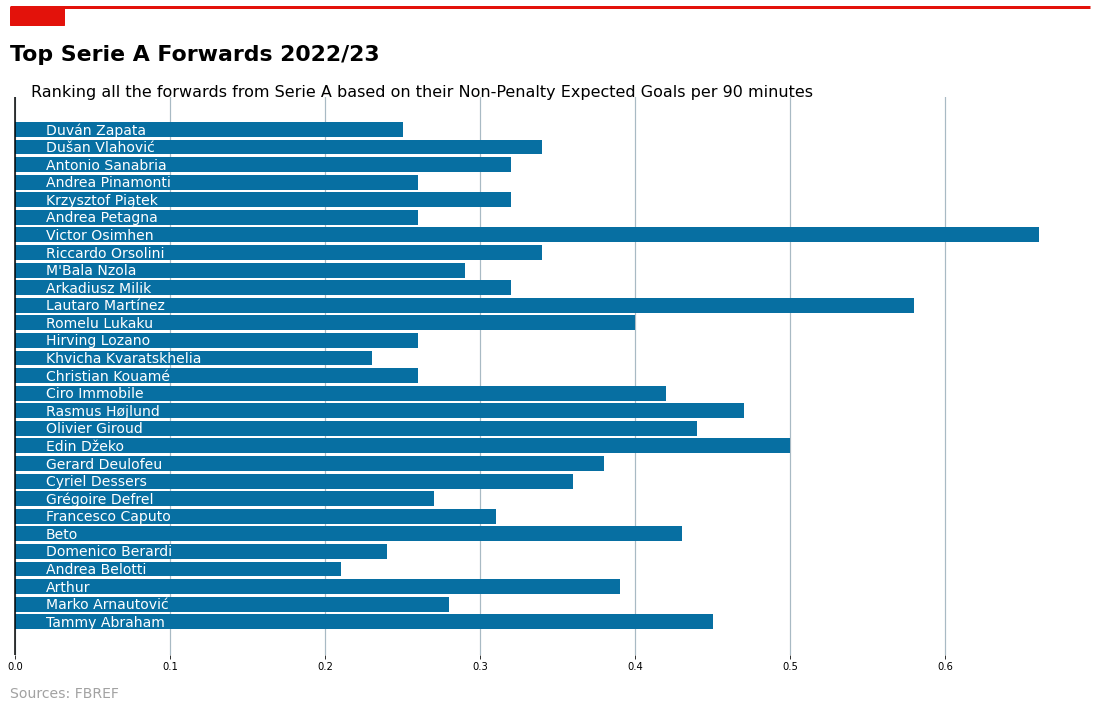

In [32]:
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

# The colors
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(15, 10))

y = serie_forwards['Player'].values
x = serie_forwards['npxGp90']

bars = ax.barh(y, x, height=0.85, align="edge", color=BLUE);

ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")

# Generate numeric positions for y-axis labels using range
y_pos = range(len(y))

for name, count, y_p, bar in zip(y, x, y_pos, bars):
    label_x = "0"
    label_color = "white"
    path_effects = None
        
    ax.text(
        float(label_x) + 0.02,
        float(y_p) + 0.4,
        name,
        color=label_color,
        fontsize=14,
        va="center",
        path_effects=path_effects,
    )
# Hide y labels
ax.yaxis.set_visible(False)

# Make room on top and bottom
fig.subplots_adjust(left=0.005, right=1, top=0.875, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Top Serie A Forwards 2022/23", 
    fontsize=22, fontweight="bold"
)

# Add subtitle
fig.text(
    0.02, 0.875, "Ranking all the forwards from Serie A based on their Non-Penalty Expected Goals per 90 minutes", 
    fontsize=16
)

# Add caption
source = "Sources: FBREF"
fig.text(
    0, 0.04, source, color=GREY, 
    fontsize=14
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Save the plot with higher DPI
plt.savefig('SerieA_forwards.png', dpi=600)

plt.show()

In [13]:
serie_forwards['Player'].values

array(['Tammy Abraham', 'Marko Arnautović', 'Arthur', 'Andrea Belotti',
       'Domenico Berardi', 'Beto', 'Francesco Caputo', 'Grégoire Defrel',
       'Cyriel Dessers', 'Gerard Deulofeu', 'Edin Džeko',
       'Olivier Giroud', 'Rasmus Højlund', 'Ciro Immobile',
       'Christian Kouamé', 'Khvicha Kvaratskhelia', 'Hirving Lozano',
       'Romelu Lukaku', 'Lautaro Martínez', 'Arkadiusz Milik',
       "M'Bala Nzola", 'Riccardo Orsolini', 'Victor Osimhen',
       'Andrea Petagna', 'Krzysztof Piątek', 'Andrea Pinamonti',
       'Antonio Sanabria', 'Dušan Vlahović', 'Duván Zapata'], dtype=object)

In [12]:
drop_names = ['Assan Ceesay', 'Lorenzo Colombo', 'Riccardo Saponara']

# Drop rows where the 'Player' column matches any of the names in 'drop_names'
serie_forwards = serie_forwards[~serie_forwards['Player'].isin(drop_names)]

### U23 900+ minutes forwards comparison

In [15]:
player_standard_stats = pd.read_csv('../../Big5/Big5-statsStats22-23.csv')
player_standard_stats.head()

Player   Nation    Pos           Squad                Comp  Age  \
0  Brenden Aaronson   us USA  MF,FW    Leeds United  eng Premier League   21   
1   Paxten Aaronson   us USA  MF,DF  Eint Frankfurt       de Bundesliga   18   
2    James Abankwah   ie IRL     DF         Udinese          it Serie A   18   
3     George Abbott  eng ENG     MF       Tottenham  eng Premier League   16   
4  Yunis Abdelhamid   ma MAR     DF           Reims          fr Ligue 1   34   

   Born  MP  Starts    Min   90s  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  CrdR  \
0  2000  36      28  2,372  26.4    1    3    4     1   0      0     2     0   
1  2003   7       0    173   1.9    0    0    0     0   0      0     1     0   
2  2004   2       1     63   0.7    0    0    0     0   0      0     0     0   
3  2005   1       0      1   0.0    0    0    0     0   0      0     0     0   
4  1987  37      37  3,330  37.0    1    2    3     1   0      0     6     0   

    xG  npxG  xAG  npxG+xAG  PrgC   PrgP   PrgR  Gls.1  Ast.1  G+A.1  G-PK.1  \
0  3.9   3.9  4.2       8.1  43.0   86.0  151.0   0.04   0.11   0.15    0.04   
1  0.2   0.2  0.0       0.2   8.0    6.0   15.0   0.00   0.00   0.00    0.00   
2  0.0   0.0  0.0       0.0   0.0    0.0    0.0   0.00   0.00   0.00    0.00   
3  0.0   0.0  0.0       0.0   0.0    0.0    0.0   0.00   0.00   0.00    0.00   
4  2.4   2.4  1.0       3.4  40.0  215.0   10.0   0.03   0.05   0.08    0.03   

   G+A-PK  xG.1  xAG.1  xG+xAG  npxG.1  npxG+xAG.1  
0    0.15  0.15   0.16    0.31    0.15        0.31  
1    0.00  0.09   0.03    0.11    0.09        0.11  
2    0.00  0.00   0.00    0.00    0.00        0.00  
3    0.00  0.00   0.00    0.00    0.00        0.00  
4    0.08  0.06   0.03    0.09    0.06        0.09

In [16]:
# Rename the columns
new_column_names = {'G-PK': 'npGls', 'Gls.1': 'Glsp90', 'Ast.1': 'Astp90', 'G+A.1': 'G+Ap90', 
                    'G-PK.1': 'npGlsp90', 'G+A-PK': 'npGlsAstp90', 'xG.1': 'xGp90', 'xAG.1': 'xAGp90', 'xG+xAG': 'xG+xAGp90',
                   'npxG.1': 'npxGp90', 'npxG+xAG.1': 'npxG+xAGp90'}

player_standard_stats = player_standard_stats.rename(columns=new_column_names)

In [18]:
# Converting mins from object type to numeric type
player_standard_stats['Min'] = player_standard_stats['Min'].replace({',':''}, regex=True)
player_standard_stats['Min'] = pd.to_numeric(player_standard_stats['Min'])

In [19]:
u23_forwards = player_standard_stats[(player_standard_stats['Pos'] == 'FW') & (player_standard_stats['Min'] > 1000) & (player_standard_stats['Age'] < 23)]
u23_forwards.head()                                     

Player  Nation Pos           Squad        Comp  Age  Born  MP  \
206  Folarin Balogun  us USA  FW           Reims  fr Ligue 1   21  2001  37   
312   El Bilal Touré  ml MLI  FW         Almería  es La Liga   20  2001  21   
443   Sergio Camello  es ESP  FW  Rayo Vallecano  es La Liga   21  2001  38   
566  Lorenzo Colombo  it ITA  FW           Lecce  it Serie A   20  2002  33   
633   Thijs Dallinga  nl NED  FW        Toulouse  fr Ligue 1   21  2000  36   

     Starts   Min   90s  Gls  Ast  G+A  npGls  PK  PKatt  CrdY  CrdR    xG  \
206      34  2999  33.3   21    2   23     15   6      7     5     0  26.6   
312      15  1264  14.0    7    2    9      7   0      0     0     0   6.3   
443      27  2401  26.7    6    5   11      6   0      0     1     0   7.3   
566      18  1515  16.8    5    2    7      4   1      2     4     0   6.2   
633      28  2353  26.1   12    1   13     12   0      0     4     0   NaN   

     npxG  xAG  npxG+xAG  PrgC  PrgP   PrgR  Glsp90  Astp90  G+Ap90  npGlsp90  \
206  21.0  3.8      24.8  56.0  55.0  283.0    0.63    0.06    0.69      0.45   
312   6.3  1.3       7.6  18.0  14.0   51.0    0.50    0.14    0.64      0.50   
443   7.3  2.4       9.6  40.0  42.0  122.0    0.22    0.19    0.41      0.22   
566   4.6  1.4       6.1  14.0  21.0  119.0    0.30    0.12    0.42      0.24   
633   NaN  NaN       NaN   NaN   NaN    NaN    0.46    0.04    0.50      0.46   

     npGlsAstp90  xGp90  xAGp90  xG+xAGp90  npxGp90  npxG+xAGp90  
206         0.51   0.80    0.11       0.91     0.63         0.74  
312         0.64   0.45    0.09       0.54     0.45         0.54  
443         0.41   0.27    0.09       0.36     0.27         0.36  
566         0.36   0.37    0.09       0.45     0.27         0.36  
633         0.50    NaN     NaN        NaN      NaN          NaN

In [20]:
# u23_forwards['Player'].values
show_names = ['Folarin Balogun', 'El Bilal Touré', 'Jonathan David', 'Hugo Duro', 'Hugo Ekitike', 'Ansu Fati', 
              'Phil Foden', 'Erling Haaland', 'Rasmus Højlund', 'Alexander Isak', 'Nicolas Jackson', 'Vinicius Júnior',
              'Khvicha Kvaratskhelia', 'Martinelli', 'Bryan Mbeumo', 'Youssoufa Moukoko', 'Loïs Openda', 'Bukayo Saka',
             'Dušan Vlahović', 'Elye Wahi', 'Nico Williams']

In [72]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text
from matplotlib.patches import Ellipse
el = Ellipse((2, -1), 0.5, 0.5)

# Set the figure size
plt.figure(figsize=(20, 20), dpi=600)

# Calculate median values for x and y variables
x_median = u23_forwards['npxGp90'].median()
y_median = u23_forwards['npGlsp90'].median()

# Plot 'Glsp90' against 'xGp90'
plt.scatter(u23_forwards['npxGp90'], u23_forwards['npGlsp90'], marker='None')
plt.xlabel('Non Penalty Expected Goals per 90')
plt.ylabel('Non Penalty Goals per 90')
plt.title('Non Penalty Goals per 90 vs Non Penalty Expected Goals per 90')


# Annotate some data points with player names
texts = []
for i, player in u23_forwards.iterrows():
    if player['Player'] in show_names:
        text = plt.text(player['npxGp90']+0.01, player['npGlsp90']+0.01, player['Player'])
        texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    
# Add club logos for selected data points
for i, player in u23_forwards.iterrows():
#     if player['Player'] in show_badges:
    img_path = '../../club-logos/' + player['Squad'] + '.png'
    image = plt.imread(img_path)
    imagebox = OffsetImage(image, zoom = 0.075, alpha = 1)
    ab = AnnotationBbox(imagebox, (player['npxGp90'], player['npGlsp90']), frameon=False)
    plt.gca().add_artist(ab)

# Add median lines
plt.axhline(y=y_median, color='r', linestyle='--', label='Median npGlsp90')
plt.axvline(x=x_median, color='r', linestyle='--', label='Median xGp90')

# Quadrants explanation
plt.text(0.2, 0.85, "Scoring more\nthan expected\n(Overperforming)", size=12,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='#F4A68B',
                   fc='#F4A68B',
                   )
         )
plt.text(0.65,0.1, "Scoring less\nthan expected\n(Underperforming)", size=12,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='#F4A68B',
                   fc='#F4A68B',
                   )
         )

# Annotate with text + Arrow
x_hojlund = (u23_forwards[u23_forwards['Player'] == 'Rasmus Højlund'])['npxGp90']
x_hojlund = x_hojlund.values[0]
y_hojlund = (u23_forwards[u23_forwards['Player'] == 'Rasmus Højlund'])['npGlsp90']
y_hojlund = y_hojlund.values[0]
plt.annotate(f'Rasmus Højlund\nNon Penalty xG per 90 = {x_hojlund:.2f}\nNon Penalty Goals per 90 ={y_hojlund:.2f}',
            xy=(x_hojlund, y_hojlund), xycoords='data',
            xytext=(0.6, 0.6), textcoords='data',
            size=15,
            bbox=dict(boxstyle="round",
                      fc='#C3F8FA',
                      ec='#C3F8FA'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc='#C3F8FA', ec='#C3F8FA',
                            patchA=None,
                            patchB=el,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))

# plt.legend()
plt.grid()

# Save the plot with higher DPI
plt.savefig('U23_forwards.png', dpi=600)

plt.show()

In [22]:
u23_forwards['Player'].values

array(['Folarin Balogun', 'El Bilal Touré', 'Sergio Camello',
       'Lorenzo Colombo', 'Thijs Dallinga', 'Jonathan David',
       'Dion Drena Beljo', 'Hugo Duro', 'Hugo Ekitike', 'Ansu Fati',
       'Phil Foden', 'Anthony Gordon', 'Erling Haaland', 'Luiz Henrique',
       'Rasmus Højlund', 'Alexander Isak', 'Nicolas Jackson',
       'Vinicius Júnior', 'Arnaud Kalimuendo', 'Khvicha Kvaratskhelia',
       'Martinelli', 'Bryan Mbeumo', 'Youssoufa Moukoko', 'Loïs Openda',
       'Gonzalo Plata', 'Georginio Rutter', 'Bukayo Saka',
       'Martin Satriano', 'Abdallah Sima', 'Jørgen Strand Larsen',
       'Crysencio Summerville', 'Dušan Vlahović', 'Elye Wahi',
       'Nico Williams'], dtype=object)

In [152]:
u23_forwards[u23_forwards.isnull().any(axis=1)]

Empty DataFrame
Columns: [Player, Nation, Pos, Squad, Comp, Age, Born, MP, Starts, Min, 90s, Gls, Ast, G+A, npGls, PK, PKatt, CrdY, CrdR, xG, npxG, xAG, npxG+xAG, PrgC, PrgP, PrgR, Glsp90, Astp90, G+Ap90, npGlsp90, npGlsAstp90, xGp90, xAGp90, xG+xAGp90, npxGp90, npxG+xAGp90]
Index: []

In [151]:
u23_forwards = u23_forwards.drop(u23_forwards[u23_forwards['Player'] == 'Thijs Dallinga'].index)

### U23 Carrying Ability

In [45]:
u23_forwards_possession = pd.read_csv('../../Big5/Big5-possessionStats22-23.csv')
u23_forwards_possession.head()

Player   Nation    Pos           Squad                Comp  Age  \
0  Brenden Aaronson   us USA  MF,FW    Leeds United  eng Premier League   21   
1   Paxten Aaronson   us USA  MF,DF  Eint Frankfurt       de Bundesliga   18   
2    James Abankwah   ie IRL     DF         Udinese          it Serie A   18   
3     George Abbott  eng ENG     MF       Tottenham  eng Premier League   16   
4  Yunis Abdelhamid   ma MAR     DF           Reims          fr Ligue 1   34   

   Born   90s  Touches  Def Pen  Def 3rd  Mid 3rd  Att 3rd  Att Pen    Live  \
0  2000  26.4   1143.0     12.0    116.0    495.0    554.0     72.0  1143.0   
1  2003   1.9     99.0      2.0      6.0     41.0     53.0     17.0    99.0   
2  2004   0.7     39.0      8.0     26.0     13.0      0.0      0.0    39.0   
3  2005   0.0      2.0      1.0      1.0      1.0      0.0      0.0     2.0   
4  1987  37.0   2459.0    241.0   1088.0   1275.0    123.0     39.0  2459.0   

     Att  Succ  Succ%  Tkld  Tkld%  Carries  TotDist  PrgDist  PrgC   1/3  \
0  100.0  34.0   34.0  48.0   48.0    686.0   3646.0   1532.0  43.0  34.0   
1    6.0   3.0   50.0   3.0   50.0     55.0    314.0    143.0   8.0   2.0   
2    1.0   1.0  100.0   0.0    0.0     18.0     48.0     19.0   0.0   0.0   
3    0.0   0.0    NaN   0.0    NaN      0.0      0.0      0.0   0.0   0.0   
4   37.0  21.0   56.8  14.0   37.8   1723.0  10871.0   6123.0  40.0  21.0   

    CPA   Mis   Dis     Rec   PrgR  
0  13.0  71.0  82.0   767.0  151.0  
1   2.0   5.0   2.0    65.0   15.0  
2   0.0   1.0   1.0    21.0    0.0  
3   0.0   0.0   0.0     1.0    0.0  
4   3.0  27.0  23.0  1499.0   10.0

In [47]:
# Converting mins from object type to numeric type
u23_forwards_possession['Age'] = u23_forwards_possession['Age'].replace({',':''}, regex=True)
u23_forwards_possession['Age'] = pd.to_numeric(u23_forwards_possession['Age'])

In [49]:
u23_forwards_possession = u23_forwards_possession[(u23_forwards_possession['Pos'] == 'FW') & (u23_forwards_possession['90s'] > 12) & (u23_forwards_possession['Age'] < 23)]
u23_forwards_possession.head()                                     

Player  Nation Pos           Squad        Comp  Age  Born   90s  \
206  Folarin Balogun  us USA  FW           Reims  fr Ligue 1   21  2001  33.3   
312   El Bilal Touré  ml MLI  FW         Almería  es La Liga   20  2001  14.0   
443   Sergio Camello  es ESP  FW  Rayo Vallecano  es La Liga   21  2001  26.7   
566  Lorenzo Colombo  it ITA  FW           Lecce  it Serie A   20  2002  16.8   
633   Thijs Dallinga  nl NED  FW        Toulouse  fr Ligue 1   21  2000  26.1   

     Touches  Def Pen  Def 3rd  Mid 3rd  Att 3rd  Att Pen   Live   Att  Succ  \
206    970.0     16.0     72.0    385.0    525.0    198.0  963.0  87.0  35.0   
312    407.0     26.0     46.0    196.0    172.0     53.0  407.0  17.0   6.0   
443    782.0     29.0     51.0    337.0    406.0    101.0  782.0  46.0  18.0   
566    588.0      6.0     24.0    266.0    304.0     74.0  586.0  37.0  11.0   
633      NaN      NaN      NaN      NaN      NaN      NaN    NaN   NaN   NaN   

     Succ%  Tkld  Tkld%  Carries  TotDist  PrgDist  PrgC   1/3   CPA   Mis  \
206   40.2  44.0   50.6    742.0   4561.0   1697.0  56.0  27.0  45.0  94.0   
312   35.3   9.0   52.9    201.0   1136.0    519.0  18.0  16.0   9.0  44.0   
443   39.1  24.0   52.2    483.0   2631.0   1053.0  40.0  36.0  17.0  71.0   
566   29.7  22.0   59.5    307.0   1330.0    408.0  14.0  12.0   6.0  79.0   
633    NaN   NaN    NaN      NaN      NaN      NaN   NaN   NaN   NaN   NaN   

      Dis    Rec   PrgR  
206  74.0  743.0  283.0  
312   9.0  261.0   51.0  
443  35.0  561.0  122.0  
566  38.0  418.0  119.0  
633   NaN    NaN    NaN

In [56]:
u23_forwards_possession.head()

Player  Nation Pos           Squad        Comp  Age  Born   90s  \
206  Folarin Balogun  us USA  FW           Reims  fr Ligue 1   21  2001  33.3   
312   El Bilal Touré  ml MLI  FW         Almería  es La Liga   20  2001  14.0   
443   Sergio Camello  es ESP  FW  Rayo Vallecano  es La Liga   21  2001  26.7   
566  Lorenzo Colombo  it ITA  FW           Lecce  it Serie A   20  2002  16.8   
653   Jonathan David  ca CAN  FW           Lille  fr Ligue 1   22  2000  35.2   

     Touches  Def Pen  Def 3rd  Mid 3rd  Att 3rd  Att Pen    Live   Att  Succ  \
206    970.0     16.0     72.0    385.0    525.0    198.0   963.0  87.0  35.0   
312    407.0     26.0     46.0    196.0    172.0     53.0   407.0  17.0   6.0   
443    782.0     29.0     51.0    337.0    406.0    101.0   782.0  46.0  18.0   
566    588.0      6.0     24.0    266.0    304.0     74.0   586.0  37.0  11.0   
653   1224.0     23.0     87.0    529.0    622.0    214.0  1213.0  78.0  29.0   

     Succ%  Tkld  Tkld%  Carries  TotDist  PrgDist  PrgC   1/3   CPA   Mis  \
206   40.2  44.0   50.6    742.0   4561.0   1697.0  56.0  27.0  45.0  94.0   
312   35.3   9.0   52.9    201.0   1136.0    519.0  18.0  16.0   9.0  44.0   
443   39.1  24.0   52.2    483.0   2631.0   1053.0  40.0  36.0  17.0  71.0   
566   29.7  22.0   59.5    307.0   1330.0    408.0  14.0  12.0   6.0  79.0   
653   37.2  38.0   48.7    973.0   5196.0   1898.0  67.0  44.0  39.0  87.0   

      Dis    Rec   PrgR    CPAp90   PrgRp90  
206  74.0  743.0  283.0  1.351351  8.498498  
312   9.0  261.0   51.0  0.642857  3.642857  
443  35.0  561.0  122.0  0.636704  4.569288  
566  38.0  418.0  119.0  0.357143  7.083333  
653  52.0  947.0  297.0  1.107955  8.437500

In [74]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text
from matplotlib.patches import Ellipse
el = Ellipse((2, -1), 0.5, 0.5)

# Set the figure size
plt.figure(figsize=(18, 18), dpi=600)

# Calculate median values for x and y variables
x_median = u23_forwards_possession['PrgRp90'].median()
y_median = u23_forwards_possession['CPAp90'].median()

# Plot 'Glsp90' against 'xGp90'
plt.scatter(u23_forwards_possession['PrgRp90'], u23_forwards_possession['CPAp90'], marker='None')
plt.xlabel('Progressive Passes Received')
plt.ylabel('Carries into Penalty Area')
plt.title('Progressive Passes Received per 90 vs Carries into Penalty Area per 90')


# Annotate some data points with player names
texts = []
for i, player in u23_forwards_possession.iterrows():
    if player['Player'] in show_names:
        text = plt.text(player['PrgRp90']+0.2, player['CPAp90']+0.01, player['Player'])
        texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    
# Add club logos for selected data points
for i, player in u23_forwards_possession.iterrows():
#     if player['Player'] in show_badges:
    img_path = '../../club-logos/' + player['Squad'] + '.png'
    image = plt.imread(img_path)
    imagebox = OffsetImage(image, zoom = 0.075, alpha = 1)
    ab = AnnotationBbox(imagebox, (player['PrgRp90'], player['CPAp90']), frameon=False)
    plt.gca().add_artist(ab)

# Add median lines
plt.axvline(x=x_median, color='r', linestyle='--', label='Median PrgRp90')
plt.axhline(y=y_median, color='r', linestyle='--', label='Median CPAp90')

# Quadrants explanation
plt.text(12, 4.5, "Elite ball carriers", size=12,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='#C6F9A3',
                   fc='#C6F9A3',
                   )
         )
# plt.text(0.65,0.1, "Scoring less\nthan expected\n(Underperforming)", size=12,
#          ha="center", va="center",
#          bbox=dict(boxstyle="round",
#                    ec='#F4A68B',
#                    fc='#F4A68B',
#                    )
#          )

# # Annotate with text + Arrow
x_hojlund = (u23_forwards_possession[u23_forwards_possession['Player'] == 'Rasmus Højlund'])['PrgRp90']
x_hojlund = x_hojlund.values[0]
y_hojlund = (u23_forwards_possession[u23_forwards_possession['Player'] == 'Rasmus Højlund'])['CPAp90']
y_hojlund = y_hojlund.values[0]
plt.annotate(f'Rasmus Højlund\nProgressive passes recd per 90 = {x_hojlund:.2f}\nCarries into Penalty Area per 90 ={y_hojlund:.2f}',
            xy=(x_hojlund, y_hojlund), xycoords='data',
            xytext=(12.25, 1.65), textcoords='data',
            size=14,
            bbox=dict(boxstyle="round",
                      fc='#C3F8FA',
                      ec='#C3F8FA'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc='#C3F8FA', ec='#C3F8FA',
                            patchA=None,
                            patchB=el,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))

# plt.legend()
plt.grid()
plt.xticks(range(2, 16, 2))
# Save the plot with higher DPI
plt.savefig('U23_forwards_carrying.png', dpi=600)

plt.show()